In [1]:
import pandas as pd
from datetime import timedelta
#Data processing
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('../../Sonar/seatunnel_all_information.parquet')

In [3]:
df.describe()

,commits,additions,deletions,changed_files,total_time,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers
count,1068.000000,1068.000000,1068.000000,1068.000000,1068,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,4.382959,287.671348,121.042135,12.185393,3 days 14:42:45.272471910,138.331461,138.331461,138.044944,138.044944,255.665730,137.843633,137.843633,137.222846,385.507491
std,7.945596,1490.513171,1067.915207,59.274142,8 days 05:43:35.845727258,88.215818,88.215818,104.254464,104.254464,145.561169,87.123644,87.123644,103.466655,205.910361
min,1.000000,0.000000,0.000000,0.000000,0 days 00:00:05,3.000000,3.000000,3.000000,3.000000,14.000000,12.000000,12.000000,7.000000,70.000000
25%,1.000000,4.000000,1.000000,1.000000,0 days 02:48:58.500000,35.750000,35.750000,33.000000,33.000000,102.000000,36.750000,36.750000,33.000000,142.000000
50%,2.000000,35.000000,6.000000,3.000000,0 days 19:24:12,130.000000,130.000000,97.500000,97.500000,259.000000,130.000000,130.000000,98.000000,389.500000
75%,4.000000,183.000000,35.000000,10.000000,3 days 07:40:19.500000,203.000000,203.000000,239.250000,239.250000,373.000000,203.000000,203.000000,239.000000,545.000000
max,116.000000,38117.000000,28002.000000,1787.000000,110 days 16:44:58,285.000000,285.000000,307.000000,307.000000,504.000000,285.000000,285.000000,307.000000,696.000000


In [4]:
# df['time'] = df['total_time'].astype('int64')

In [5]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time', 'time'])]

In [6]:
cl = list(df['total_time'])

In [7]:
scaler = preprocessing.MinMaxScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [8]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [10]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 2


In [11]:
# Perform KMeans clustering
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [12]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [13]:
df['cluster'] = cluster_labels

In [14]:
df.shape

(1068, 20)

In [15]:
df['total_time'].min()

Timedelta('0 days 00:00:05')

In [16]:
df['total_time'].max()

Timedelta('110 days 16:44:58')

In [17]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['total_time'].min())
print(cluster_0['total_time'].max())
cluster_0.shape

0 days 00:00:05
110 days 16:44:58


(1066, 20)

In [18]:
cluster_0[['total_time','begin_Bloaters', 'end_Bloaters']]

,total_time,begin_Bloaters,end_Bloaters
0,3 days 01:27:48,262.0,261.0
1,3 days 04:15:10,262.0,262.0
2,0 days 05:24:03,262.0,261.0
3,4 days 00:22:26,262.0,261.0
4,12 days 00:39:27,261.0,262.0
...,...,...,...
1063,0 days 00:43:10,14.0,15.0
1064,0 days 19:01:39,12.0,14.0
1065,0 days 00:16:22,12.0,14.0
1066,0 days 00:33:35,3.0,14.0


In [19]:
cluster_0[['total_time', 'begin_Couplers', 'end_Couplers']]

,total_time,begin_Couplers,end_Couplers
0,3 days 01:27:48,304.0,304.0
1,3 days 04:15:10,304.0,304.0
2,0 days 05:24:03,304.0,304.0
3,4 days 00:22:26,304.0,304.0
4,12 days 00:39:27,304.0,304.0
...,...,...,...
1063,0 days 00:43:10,7.0,7.0
1064,0 days 19:01:39,8.0,7.0
1065,0 days 00:16:22,8.0,7.0
1066,0 days 00:33:35,3.0,7.0


In [20]:
cluster_0.describe()

,commits,additions,deletions,changed_files,total_time,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,cluster
count,1066.000000,1066.000000,1066.000000,1066.000000,1066,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0
mean,4.315197,228.612570,94.923077,10.208255,3 days 14:48:56.679174484,138.257036,138.257036,137.922139,137.922139,255.532833,137.768293,137.768293,137.103189,385.274859,0.0
std,7.607020,534.552419,641.869390,21.316391,8 days 05:53:46.080651234,88.256304,88.256304,104.276225,104.276225,145.618252,87.162154,87.162154,103.491936,205.978777,0.0
min,1.000000,0.000000,0.000000,0.000000,0 days 00:00:05,3.000000,3.000000,3.000000,3.000000,14.000000,12.000000,12.000000,7.000000,70.000000,0.0
25%,1.000000,4.000000,1.000000,1.000000,0 days 02:48:31.500000,35.250000,35.250000,33.000000,33.000000,102.000000,36.250000,36.250000,33.000000,142.000000,0.0
50%,2.000000,35.000000,6.000000,3.000000,0 days 19:24:12,130.000000,130.000000,97.000000,97.000000,259.000000,130.000000,130.000000,98.000000,388.500000,0.0
75%,4.000000,183.000000,34.750000,9.000000,3 days 08:14:00.500000,203.000000,203.000000,239.000000,239.000000,373.000000,203.000000,203.000000,238.750000,545.000000,0.0
max,116.000000,5674.000000,17465.000000,258.000000,110 days 16:44:58,285.000000,285.000000,307.000000,307.000000,504.000000,285.000000,285.000000,307.000000,696.000000,0.0


In [21]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['total_time'].min())
print(cluster_1['total_time'].max())
cluster_1.shape

0 days 12:51:29
2 days 02:35:22


(2, 20)

In [22]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['total_time'].min())
print(cluster_2['total_time'].max())
cluster_2.shape

NaT
NaT


(0, 20)

In [23]:
def remove_outliers_madn(data, threshold=2.24):
    median = np.median(data)
    mad = np.median(np.abs(data - median))

    # Calculate modified Z-score for each data point
    modified_z_scores = 0.6745 * (data - median) / mad

    # Identify and remove outliers based on the threshold
    filtered_data = data[abs(modified_z_scores) < threshold]

    return filtered_data

In [24]:
# Example usage
filtered_data = remove_outliers_madn(df_scaler, threshold=2.24)

print("Original data:", df_scaler)
print("Filtered data:", filtered_data)

Original data: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.69565217e-03
  0.00000000e+00 0.00000000e+00]
 [2.62350132e-04 5.24700265e-05 9.44460477e-04 ... 1.81021591e-03
  2.88585146e-04 9.44460477e-04]
 [1.42846940e-04 3.57117349e-05 2.39268624e-03 ... 1.74987501e-03
  4.02828369e-02 0.00000000e+00]
 ...
 [9.12087912e-01 9.15750916e-01 9.12087912e-01 ... 7.32600733e-03
  7.32600733e-03 0.00000000e+00]
 [9.90000000e-01 9.90000000e-01 9.90000000e-01 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-03]
 [9.95207668e-01 9.95207668e-01 9.95207668e-01 ... 3.03514377e-02
  3.03514377e-02 3.03514377e-02]]
Filtered data: [0.         0.         0.         ... 0.03035144 0.03035144 0.03035144]


C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


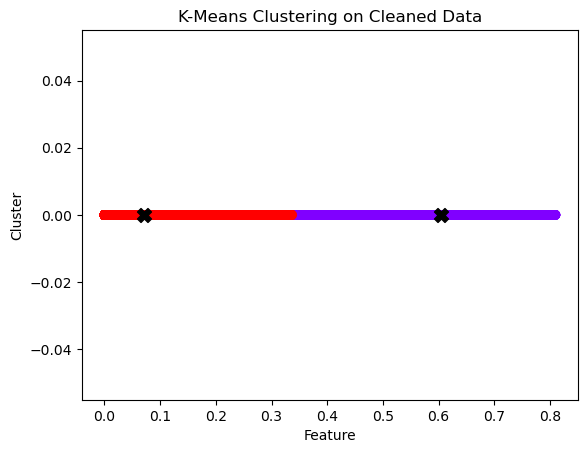

In [28]:
# Reshape the data to a 2D array if needed
cleaned_data = filtered_data.reshape(-1, 1)

# Specify the number of clusters you want to find
n_clusters = 2

# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(cleaned_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(cleaned_data, np.zeros_like(cleaned_data), c=labels, cmap='rainbow')
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), marker='X', color='black', s=100)
plt.title('K-Means Clustering on Cleaned Data')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [26]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

In [30]:
# determine_outlier_thresholds_std(df['total_time'], df.columns)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


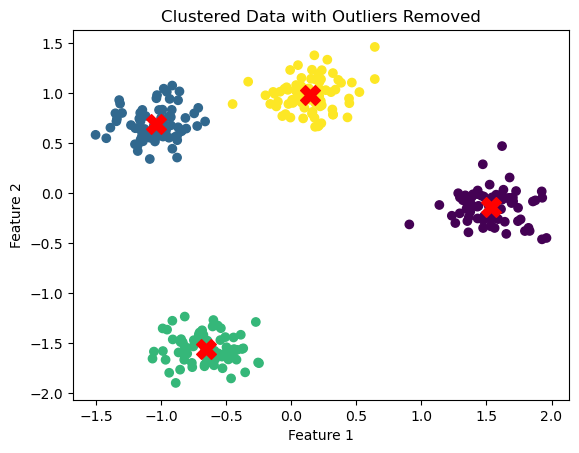

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Generate synthetic data with outliers
data, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)
outliers = np.array([[0, 10], [0, 12]])
data = np.vstack((data, outliers))

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(data))
threshold = 2.5
data = data[(z_scores < threshold).all(axis=1)]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Cluster the data using K-means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Plot the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('Clustered Data with Outliers Removed')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
